In [1]:
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
root_folder = "/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/data"

all_data = []

# Loop through each month folder
for month_folder in os.listdir(root_folder):

    full_month_path = os.path.join(root_folder, month_folder)

    # Ensure it's a folder
    if os.path.isdir(full_month_path):

        # Loop through YAML files inside the month folder
        for file in os.listdir(full_month_path):
            if file.endswith(".yaml") or file.endswith(".yml"):
                
                file_path = os.path.join(full_month_path, file)

                with open(file_path, "r") as f:
                    data = yaml.safe_load(f)

                df = pd.DataFrame(data)

                # Add month & file as metadata (optional)
                df["month"] = month_folder
                df["source_file"] = file

                all_data.append(df)

# Combine everything
final_df = pd.concat(all_data, ignore_index=True)

# Save to CSV
output_path = "/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/all_stock_data.csv"
final_df.to_csv(output_path, index=False)


print(final_df.head())


       Ticker    close                 date     high      low    month  \
0        SBIN   642.75  2024-01-04 05:30:00   646.40   638.65  2024-01   
1  BAJFINANCE  7705.55  2024-01-04 05:30:00  7733.95  7560.00  2024-01   
2       TITAN  3719.70  2024-01-04 05:30:00  3727.00  3686.65  2024-01   
3         ITC   476.40  2024-01-04 05:30:00   481.45   474.20  2024-01   
4         TCS  3666.80  2024-01-04 05:30:00  3719.00  3651.00  2024-01   

      open    volume               source_file  
0   642.50  13883388  2024-01-04_05-30-00.yaml  
1  7560.00   2911879  2024-01-04_05-30-00.yaml  
2  3696.00    545228  2024-01-04_05-30-00.yaml  
3   480.00  11786959  2024-01-04_05-30-00.yaml  
4  3701.75   3598144  2024-01-04_05-30-00.yaml  


In [3]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume,source_file
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388,2024-01-04_05-30-00.yaml
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879,2024-01-04_05-30-00.yaml
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228,2024-01-04_05-30-00.yaml
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959,2024-01-04_05-30-00.yaml
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144,2024-01-04_05-30-00.yaml


In [4]:
final_df.drop("source_file", axis=1, inplace=True)

In [5]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144


In [6]:
final_df.shape

(14200, 8)

In [7]:
ticker_unique = final_df['Ticker'].unique()
ticker_unique

array(['SBIN', 'BAJFINANCE', 'TITAN', 'ITC', 'TCS', 'LT', 'TATACONSUM',
       'RELIANCE', 'HCLTECH', 'JSWSTEEL', 'ULTRACEMCO', 'POWERGRID',
       'INFY', 'TRENT', 'BHARTIARTL', 'TATAMOTORS', 'WIPRO', 'TECHM',
       'NTPC', 'HINDUNILVR', 'APOLLOHOSP', 'M&M', 'GRASIM', 'ICICIBANK',
       'ADANIENT', 'ADANIPORTS', 'BEL', 'BAJAJFINSV', 'EICHERMOT',
       'COALINDIA', 'MARUTI', 'INDUSINDBK', 'ASIANPAINT', 'TATASTEEL',
       'HDFCLIFE', 'DRREDDY', 'SUNPHARMA', 'KOTAKBANK', 'SHRIRAMFIN',
       'NESTLEIND', 'ONGC', 'CIPLA', 'BPCL', 'BRITANNIA', 'SBILIFE',
       'HINDALCO', 'HEROMOTOCO', 'AXISBANK', 'HDFCBANK', 'BAJAJ-AUTO'],
      dtype=object)

In [8]:
# for each ticker get the data and save it to a csv file
for i in ticker_unique:
    df = final_df[final_df['Ticker'] == i]
    df.to_csv(f'/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/data/{i}.csv', index=False)




In [9]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144


In [10]:
final_df.describe()

,close,high,low,open,volume
count,14200.000000,14200.000000,14200.000000,14200.000000,1.420000e+04
mean,2449.415380,2476.495940,2422.374544,2450.982693,6.833475e+06
std,2573.791109,2601.744121,2545.346794,2575.276197,1.129303e+07
min,116.600000,118.550000,114.600000,114.600000,5.987000e+03
25%,821.850000,831.900000,814.500000,824.775000,9.636955e+05
50%,1508.175000,1523.875000,1493.315000,1510.000000,2.446882e+06
75%,3101.762500,3138.150000,3066.062500,3101.837500,8.592909e+06
max,13495.600000,13680.000000,13274.450000,13393.000000,2.680527e+08


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  14200 non-null  object 
 1   close   14200 non-null  float64
 2   date    14200 non-null  object 
 3   high    14200 non-null  float64
 4   low     14200 non-null  float64
 5   month   14200 non-null  object 
 6   open    14200 non-null  float64
 7   volume  14200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 887.6+ KB


In [12]:
# need to change the date column to datetime
final_df['date'] = pd.to_datetime(final_df['date'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ticker  14200 non-null  object        
 1   close   14200 non-null  float64       
 2   date    14200 non-null  datetime64[ns]
 3   high    14200 non-null  float64       
 4   low     14200 non-null  float64       
 5   month   14200 non-null  object        
 6   open    14200 non-null  float64       
 7   volume  14200 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 887.6+ KB


In [13]:
# need to split the year in date column
final_df['year'] = final_df['date'].dt.year
final_df.head()

,Ticker,close,date,high,low,month,open,volume,year
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388,2024
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879,2024
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228,2024
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959,2024
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144,2024


In [14]:
final_df['daily_return'] = (
    final_df.groupby('Ticker')['close']
      .pct_change()
)

# Calculate cumulative returns(All Years)

final_df['cumulative_return'] = (
    final_df.groupby(['Ticker', 'year'])['daily_return']
      .transform(lambda x: (1 + x).cumprod() - 1)
)

In [15]:
# Load sector data
sector_df = pd.read_csv('/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/Sector_data - Sheet1.csv')
sector_df.head()

,COMPANY,sector,Symbol
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK


In [16]:
# Clean the Symbol Column
sector_df['Ticker'] = sector_df['Symbol'].str.split(':').str[-1].str.strip()
sector_df.head()

,COMPANY,sector,Symbol,Ticker
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN,ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS,ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP,APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT,ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK,AXISBANK


In [17]:
sector_df['Ticker'].unique()

array(['ADANIGREEN', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BEL', 'AIRTEL', 'BPCL',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH',
       'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR',
       'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL',
       'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SBIN', 'SBILIFE', 'SHRIRAMFIN',
       'SUNPHARMA', 'TATACONSUMER', 'TATAMOTORS', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO'], dtype=object)

In [18]:
# Merge Stock Data with Sector Data
final_df = pd.merge(final_df, sector_df[['Ticker', 'sector']], on='Ticker', how='left')
final_df.head()

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388,2024,NaN,NaN,BANKING
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879,2024,NaN,NaN,FINANCE
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228,2024,NaN,NaN,RETAILING
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959,2024,NaN,NaN,FOOD & TOBACCO
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144,2024,NaN,NaN,SOFTWARE


In [19]:
final_df.isnull().sum()

Ticker                  0
close                   0
date                    0
high                    0
low                     0
month                   0
open                    0
volume                  0
year                    0
daily_return           50
cumulative_return      50
sector               1136
dtype: int64

In [20]:
final_df.describe()

,close,date,high,low,open,volume,year,daily_return,cumulative_return
count,14200.000000,14200,14200.000000,14200.000000,14200.000000,1.420000e+04,14200.000000,14150.000000,14150.000000
mean,2449.415380,2024-04-27 20:17:19.436619776,2476.495940,2422.374544,2450.982693,6.833475e+06,2023.785211,0.003042,0.381898
min,116.600000,2023-10-03 05:30:00,118.550000,114.600000,114.600000,5.987000e+03,2023.000000,-0.613346,-0.910298
25%,821.850000,2024-01-14 11:30:00,831.900000,814.500000,824.775000,9.636955e+05,2024.000000,-0.021970,-0.082690
50%,1508.175000,2024-04-29 17:30:00,1523.875000,1493.315000,1510.000000,2.446882e+06,2024.000000,0.000547,0.090355
75%,3101.762500,2024-08-09 23:30:00,3138.150000,3066.062500,3101.837500,8.592909e+06,2024.000000,0.023436,0.466785
max,13495.600000,2024-11-22 05:30:00,13680.000000,13274.450000,13393.000000,2.680527e+08,2024.000000,1.958139,23.231537
std,2573.791109,NaN,2601.744121,2545.346794,2575.276197,1.129303e+07,0.410690,0.072480,1.275555


In [21]:
final_df['daily_return'].fillna(0, inplace=True)

/tmp/ipykernel_24725/3893402152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['daily_return'].fillna(0, inplace=True)


In [22]:
final_df['cumulative_return'].fillna(0, inplace=True)

/tmp/ipykernel_24725/3984864793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['cumulative_return'].fillna(0, inplace=True)


In [23]:
final_df['sector'].value_counts()

sector
BANKING            1704
AUTOMOBILES        1704
SOFTWARE           1420
FINANCE             852
ENERGY              852
PHARMACEUTICALS     852
FOOD & TOBACCO      568
RETAILING           568
POWER               568
INSURANCE           568
MISCELLANEOUS       568
STEEL               568
FMCG                284
CEMENT              284
ENGINEERING         284
TEXTILES            284
MINING              284
DEFENCE             284
PAINTS              284
ALUMINIUM           284
Name: count, dtype: int64

In [24]:
sector_df['Ticker'].unique()

array(['ADANIGREEN', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BEL', 'AIRTEL', 'BPCL',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH',
       'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR',
       'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL',
       'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SBIN', 'SBILIFE', 'SHRIRAMFIN',
       'SUNPHARMA', 'TATACONSUMER', 'TATAMOTORS', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO'], dtype=object)

In [25]:
final_df.isnull().sum()

Ticker                  0
close                   0
date                    0
high                    0
low                     0
month                   0
open                    0
volume                  0
year                    0
daily_return            0
cumulative_return       0
sector               1136
dtype: int64

In [26]:
final_df[final_df['sector'].isnull()]   

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
6,TATACONSUM,1111.73,2024-01-04 05:30:00,1114.74,1072.82,2024-01,1074.74,2743090,2024,0.000000,0.000000,NaN
14,BHARTIARTL,1047.90,2024-01-04 05:30:00,1058.80,1027.55,2024-01,1035.25,4664043,2024,0.000000,0.000000,NaN
24,ADANIENT,2998.30,2024-01-04 05:30:00,3044.45,2990.00,2024-01,3039.40,2975620,2024,0.000000,0.000000,NaN
43,BRITANNIA,5361.30,2024-01-04 05:30:00,5375.00,5221.00,2024-01,5253.80,413391,2024,0.000000,0.000000,NaN
56,TATACONSUM,1147.44,2024-01-19 05:30:00,1151.29,1132.62,2024-01,1142.55,889111,2024,0.032121,0.032121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14143,BRITANNIA,6133.10,2024-09-13 05:30:00,6148.80,6057.35,2024-09,6138.00,274846,2024,0.049550,0.790833,NaN
14156,TATACONSUM,1199.00,2024-09-03 05:30:00,1218.35,1196.30,2024-09,1209.00,1884428,2024,-0.009337,1.151775,NaN
14164,BHARTIARTL,1560.60,2024-09-03 05:30:00,1579.00,1558.60,2024-09,1579.00,4546295,2024,-0.045183,3.774164,NaN
14174,ADANIENT,3036.10,2024-09-03 05:30:00,3053.05,3023.80,2024-09,3037.00,1371577,2024,0.022824,0.878831,NaN


In [27]:
final_df[final_df['sector'].isnull()]['Ticker'].unique()


array(['TATACONSUM', 'BHARTIARTL', 'ADANIENT', 'BRITANNIA'], dtype=object)

In [28]:
final_df.loc[final_df['Ticker'] == 'TATACONSUM', 'sector'] = 'FMCG'

In [29]:
final_df.loc[final_df['Ticker'] == 'BHARTIARTL', 'sector'] = 'TELECOM'

In [30]:
final_df.loc[final_df['Ticker'] == 'ADANIENT', 'sector'] = 'MISCELLANEOUS'
final_df.loc[final_df['Ticker'] == 'BRITANNIA', 'sector'] = 'FMCG'

In [31]:
final_df.isnull().sum()

Ticker               0
close                0
date                 0
high                 0
low                  0
month                0
open                 0
volume               0
year                 0
daily_return         0
cumulative_return    0
sector               0
dtype: int64

In [32]:
final_df.duplicated().sum()

np.int64(0)

In [33]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
0,SBIN,642.75,2024-01-04 05:30:00,646.40,638.65,2024-01,642.50,13883388,2024,0.0,0.0,BANKING
1,BAJFINANCE,7705.55,2024-01-04 05:30:00,7733.95,7560.00,2024-01,7560.00,2911879,2024,0.0,0.0,FINANCE
2,TITAN,3719.70,2024-01-04 05:30:00,3727.00,3686.65,2024-01,3696.00,545228,2024,0.0,0.0,RETAILING
3,ITC,476.40,2024-01-04 05:30:00,481.45,474.20,2024-01,480.00,11786959,2024,0.0,0.0,FOOD & TOBACCO
4,TCS,3666.80,2024-01-04 05:30:00,3719.00,3651.00,2024-01,3701.75,3598144,2024,0.0,0.0,SOFTWARE


In [34]:
final_df.columns

Index(['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume',
       'year', 'daily_return', 'cumulative_return', 'sector'],
      dtype='object')

In [35]:
final_df.columns

Index(['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume',
       'year', 'daily_return', 'cumulative_return', 'sector'],
      dtype='object')

In [36]:
final_df['year'].unique()   

array([2024, 2023], dtype=int32)

In [37]:
final_df = final_df.sort_values(['Ticker', 'date'])
final_df

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
9274,ADANIENT,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,2023,-0.047519,-0.270718,MISCELLANEOUS
9324,ADANIENT,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,2023,0.032548,-0.246982,MISCELLANEOUS
9574,ADANIENT,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,2023,0.024934,-0.246554,MISCELLANEOUS
9474,ADANIENT,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,2023,0.031596,-0.242965,MISCELLANEOUS
9674,ADANIENT,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,2023,-0.022295,-0.253809,MISCELLANEOUS
...,...,...,...,...,...,...,...,...,...,...,...,...
2766,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,2024,0.008363,0.252653,SOFTWARE
2366,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,2024,-0.028383,0.222038,SOFTWARE
2716,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,2024,0.039201,0.242263,SOFTWARE
2566,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,2024,-0.028509,0.231543,SOFTWARE


In [38]:
df_2024 = final_df[final_df['year'] == 2024]
df_2024.head()

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
1074,ADANIENT,2917.2,2024-01-01 05:30:00,2947.00,2842.05,2024-01,2852.30,2898619,2024,0.008156,-0.027049,MISCELLANEOUS
774,ADANIENT,2932.4,2024-01-02 05:30:00,2948.20,2841.00,2024-01,2922.00,2671368,2024,-0.010494,-0.021979,MISCELLANEOUS
824,ADANIENT,3003.0,2024-01-03 05:30:00,3199.00,2955.60,2024-01,3047.00,19725411,2024,0.024076,0.001568,MISCELLANEOUS
24,ADANIENT,2998.3,2024-01-04 05:30:00,3044.45,2990.00,2024-01,3039.40,2975620,2024,0.000000,0.000000,MISCELLANEOUS
474,ADANIENT,3006.6,2024-01-05 05:30:00,3066.90,2981.10,2024-01,3009.95,3219949,2024,-0.002654,0.002768,MISCELLANEOUS


        Ticker  volatility
0     ADANIENT    0.027894
1   ADANIPORTS    0.025839
8          BEL    0.024814
47       TRENT    0.024524
34        ONGC    0.024115
10        BPCL    0.023276
39  SHRIRAMFIN    0.022073
13   COALINDIA    0.022069
21    HINDALCO    0.020871
24  INDUSINDBK    0.020504


/tmp/ipykernel_24725/3440004071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['daily_returns'] = (


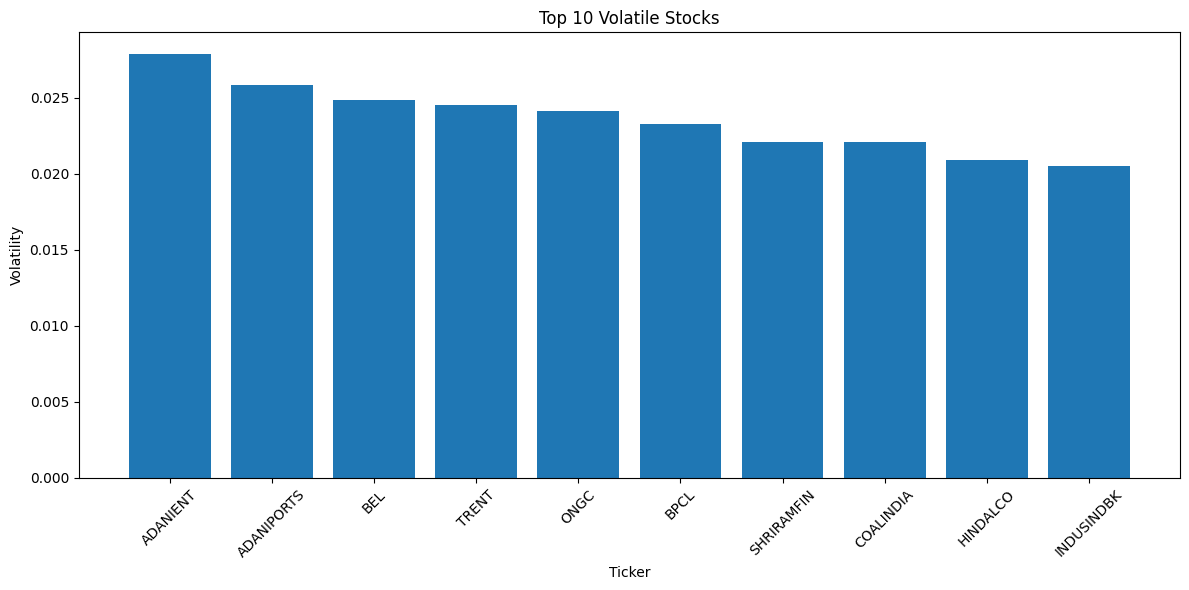

In [39]:
# 1. Calaculate the daily returns
df_2024['daily_returns'] = (
    df_2024.groupby('Ticker')['close'].pct_change()
)

# Calaculate the volatitlity (standard deviation)
volatitlity_df = (
    df_2024.groupby('Ticker')['daily_returns'].std().reset_index().rename(columns={'daily_returns': 'volatility'})
)

# Select top 10 most volatile stocks
top_10 = volatitlity_df.sort_values('volatility', ascending=False).head(10)
print(top_10)

# Visualization - Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(top_10['Ticker'], top_10['volatility'])
plt.xlabel('Ticker')
plt.ylabel('Volatility')
plt.title('Top 10 Volatile Stocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
df_2024

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector,daily_returns
1074,ADANIENT,2917.20,2024-01-01 05:30:00,2947.00,2842.05,2024-01,2852.30,2898619,2024,0.008156,-0.027049,MISCELLANEOUS,NaN
774,ADANIENT,2932.40,2024-01-02 05:30:00,2948.20,2841.00,2024-01,2922.00,2671368,2024,-0.010494,-0.021979,MISCELLANEOUS,0.005210
824,ADANIENT,3003.00,2024-01-03 05:30:00,3199.00,2955.60,2024-01,3047.00,19725411,2024,0.024076,0.001568,MISCELLANEOUS,0.024076
24,ADANIENT,2998.30,2024-01-04 05:30:00,3044.45,2990.00,2024-01,3039.40,2975620,2024,0.000000,0.000000,MISCELLANEOUS,-0.001565
474,ADANIENT,3006.60,2024-01-05 05:30:00,3066.90,2981.10,2024-01,3009.95,3219949,2024,-0.002654,0.002768,MISCELLANEOUS,0.002768
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,2024,0.008363,0.252653,SOFTWARE,-0.004042
2366,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,2024,-0.028383,0.222038,SOFTWARE,-0.024440
2716,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,2024,0.039201,0.242263,SOFTWARE,0.016551
2566,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,2024,-0.028509,0.231543,SOFTWARE,-0.008630


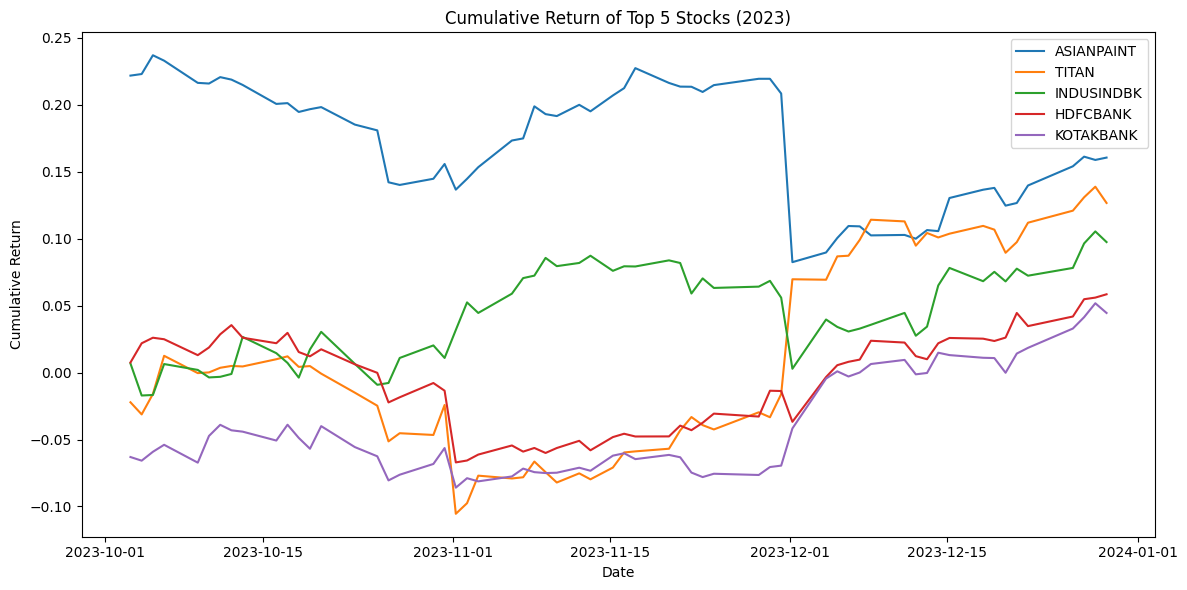

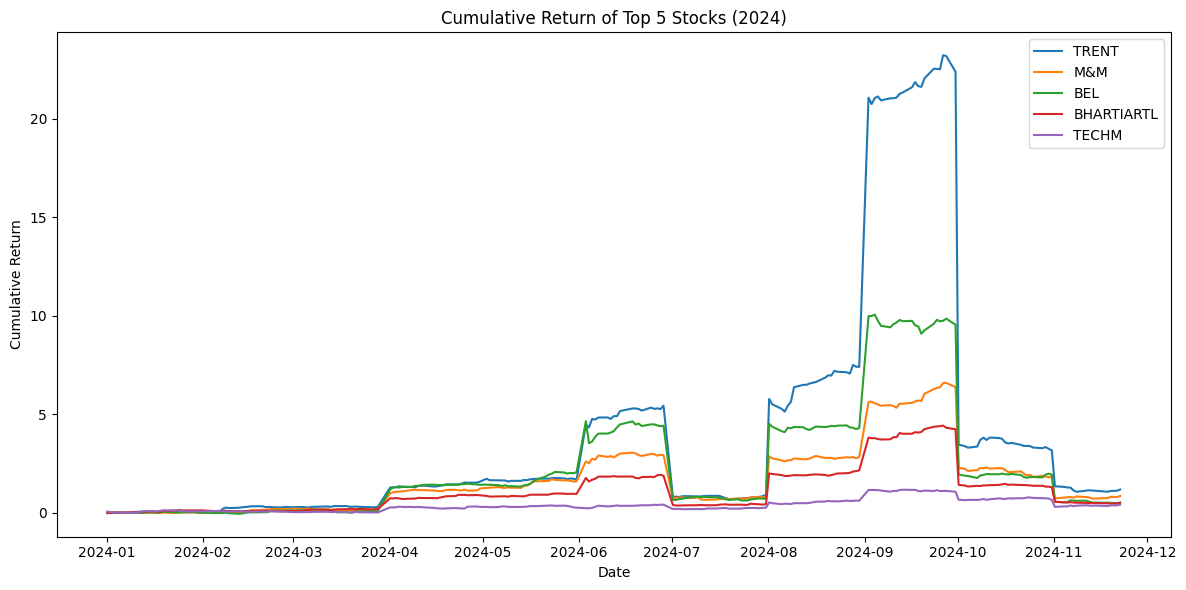

In [41]:
# 2. Cumulative Returns Over time

years = final_df['year'].unique()

for yr in sorted(years):
    df_year = final_df[final_df['year'] == yr]

    # Get top 5 stocks based on final cumulative return
    top_5 = (
        df_year
        .groupby('Ticker')['cumulative_return']
        .last()
        .sort_values(ascending=False)
        .head(5)
        .index
    )

    # Plot
    plt.figure(figsize=(12, 6))

    for ticker in top_5:
        stock_data = df_year[df_year['Ticker'] == ticker]
        plt.plot(
            stock_data['date'],
            stock_data['cumulative_return'],
            label=ticker
        )

    plt.title(f'Cumulative Return of Top 5 Stocks ({yr})')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.tight_layout()
    plt.show()



In [42]:
final_df['Ticker'].unique()

array(['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BEL', 'BHARTIARTL',
       'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT',
       'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO',
       'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC',
       'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND',
       'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SBIN',
       'SHRIRAMFIN', 'SUNPHARMA', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL',
       'TCS', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO'],
      dtype=object)

In [43]:
# 3. Sector-wise Performance:
sector_df.head()

,COMPANY,sector,Symbol,Ticker
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN,ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS,ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP,APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT,ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK,AXISBANK


In [44]:
# Calculate Yearly Return per Stock
yearly_return = (
    final_df.groupby(['Ticker', 'year'])
    .agg(
        first_close = ('close', 'first'),
        last_close = ('close', 'last'),
        sector = ('sector', 'first')
    )
    .reset_index()
)

yearly_return['yearly_return %'] = (
    (yearly_return['last_close'] - yearly_return['first_close']) / yearly_return['first_close']
) * 100

In [45]:
# Calculate Average Yearly Return by Sector
sector_performance_year = (
    yearly_return.groupby(['sector', 'year'])['yearly_return %']
    .mean()
    .reset_index()
)

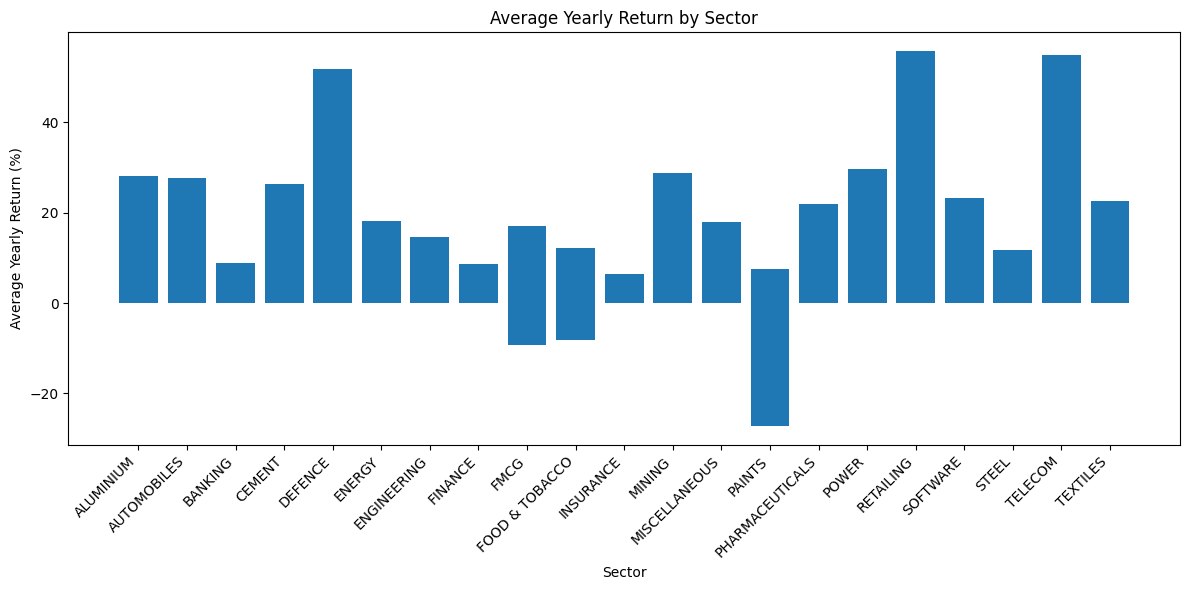

In [46]:
# Visualization – Sector-wise Bar Chart
plt.figure(figsize=(12,6))
plt.bar(sector_performance_year['sector'], sector_performance_year['yearly_return %'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sector')
plt.ylabel('Average Yearly Return (%)')
plt.title('Average Yearly Return by Sector')
plt.tight_layout()
plt.show()

In [47]:
final_df.columns

Index(['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume',
       'year', 'daily_return', 'cumulative_return', 'sector'],
      dtype='object')

In [48]:
# 4. Stock Price Correlation

returns_pivot = final_df.pivot_table(
    index = 'date',
    columns = 'Ticker',
    values = 'daily_return'
)

In [49]:
# Calculate Correlation Matrix
corr_matrix = returns_pivot.corr()

In [50]:
# Plot Correlation Heatmap

import plotly.express as px

fig = px.imshow(
    corr_matrix,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    labels = dict(x='Ticker', y='Ticker', color='Correlation'),
    title='Stock Price Correlation Heatmap'
)

fig.update_layout(
    width=1200,
    height=800,
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

fig.show()

In [51]:
# Dashboard-Style Visualization
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [52]:
monthly_return = (
    final_df
    .groupby(['Ticker', 'year', 'month'])['close']
    .agg(first_close='first', last_close='last')
    .reset_index()
)

monthly_return['monthly_return_%'] = (
    (monthly_return['last_close'] - monthly_return['first_close'])
    / monthly_return['first_close']
) * 100


In [57]:
months_list = (
    monthly_return[['year', 'month']]
    .drop_duplicates()
    .sort_values(['year', 'month'])
    .values.tolist()
)

n_plots = len(months_list)
cols = 3
rows = math.ceil(n_plots / cols)

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=[f"{mon} {yr}" for yr, mon in months_list]
)

row, col = 1, 1

for yr, mon in months_list:

    data = monthly_return[
        (monthly_return['year'] == yr) &
        (monthly_return['month'] == mon)
    ]

    # Top 5 Gainers
    top_gainers = data.sort_values(
        'monthly_return_%', ascending=False
    ).head(5)

    # Top 5 Losers
    top_losers = data.sort_values(
        'monthly_return_%'
    ).head(5)

    # GAINERS (Green)
    fig.add_trace(
        go.Bar(
            x=top_gainers['Ticker'],
            y=top_gainers['monthly_return_%'],
            text=top_gainers['monthly_return_%'].round(2),
            textposition='outside',
            marker_color='green',
            name='Gainers'
        ),
        row=row,
        col=col
    )

    # LOSERS (Red)
    fig.add_trace(
        go.Bar(
            x=top_losers['Ticker'],
            y=top_losers['monthly_return_%'],
            text=top_losers['monthly_return_%'].round(2),
            textposition='outside',
            marker_color='red',
            name='Losers'
        ),
        row=row,
        col=col
    )

    col += 1
    if col > cols:
        col = 1
        row += 1

fig.update_layout(
    title="Top 5 Gainers and Losers by Month (All Years)",
    height=350 * rows,
    showlegend=False,
    barmode='group'
)

# Zero reference line
fig.add_hline(y=0, line_dash="dash", line_color="black")

fig.show()


In [54]:
final_df.columns

Index(['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume',
       'year', 'daily_return', 'cumulative_return', 'sector'],
      dtype='object')

In [55]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
9274,ADANIENT,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,2023,-0.047519,-0.270718,MISCELLANEOUS
9324,ADANIENT,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,2023,0.032548,-0.246982,MISCELLANEOUS
9574,ADANIENT,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,2023,0.024934,-0.246554,MISCELLANEOUS
9474,ADANIENT,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,2023,0.031596,-0.242965,MISCELLANEOUS
9674,ADANIENT,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,2023,-0.022295,-0.253809,MISCELLANEOUS


In [56]:
# need to save the data as nifty_50.csv
final_df.to_csv('/home/shigilsasi/code/Guvi_Projects/Stock_Analysis/data/nifty_50.csv', index=False)